This notebook is to compute the PCA and UMAP plots for different number of genes, starting from the inditial number of genes (28603), moving through the 142 genes obtained after the Kolmogorov-Smirnov filtering and finally with the 10 selected genes that give the maximum separation between Sen, Nsen and Bas communities.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import matplotlib
import itertools
import community
import math
import seaborn as sns

### Dataframe containing 28603 genes

In [2]:
df_28603 = pd.read_csv("df_nonzero_means.csv", sep="\t")
df_28603.columns = df_28603.columns.str.rstrip('mean')
df_28603.columns = df_28603.columns.str.rstrip('_')
df_28603

,geneID,G7F,G7FNSen,G7FSen,G7M,G7MNSen,G7MSen,G7S,G7SNSen,G7SSen,...,G3SSen,Y3F,Y3FNSen,Y3FSen,Y3M,Y3MNSen,Y3MSen,Y3SNSen,Y3SSen,Y3S
0,ENSMUSG00000102693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.186836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSMUSG00000051951,0.000000,0.000000,0.080156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.261546,0.000000,0.000000,0.092896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUSG00000103377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.220484,0.228021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSMUSG00000104017,0.000000,0.040924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171770,...,0.777498,0.000000,0.174468,0.233775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSMUSG00000103025,0.000000,0.000000,0.546004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28598,ENSMUSG00000100637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
28599,ENSMUSG00000102045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.114366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
28600,ENSMUSG00000095134,0.404402,0.334275,1.443351,1.716083,0.921423,2.148395,0.178802,0.119666,0.230058,...,1.453814,0.536784,1.080802,1.353583,8.453523,1.828105,2.310018,0.191635,0.338584,0.054870
28601,ENSMUSG00000095366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.377885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Dataframe containing 142 genes

In [3]:
df_ranked= pd.read_csv("ranked_df_142.csv", sep="\t")
df_142genes = df_ranked.iloc[:,2:39]
df_142genes.columns = df_142genes.columns.str.rstrip('mean')
df_142genes.columns = df_142genes.columns.str.rstrip('_')
df_142genes

,symbol,G7F,G7FNSen,G7FSen,G7M,G7MNSen,G7MSen,G7S,G7SNSen,G7SSen,...,G3SSen,Y3F,Y3FNSen,Y3FSen,Y3M,Y3MNSen,Y3MSen,Y3SNSen,Y3SSen,Y3S
0,Fabp3,1.108826,2.634362,7.292113,1.114405,0.000000,6.984152,3.854309,2.837667,4.025069,...,14.321997,1.372702,3.080218,6.496544,13.002197,0.000000,41.515963,1.080518,14.369990,3.202665
1,Gm38050,1.264172,4.773241,5.320926,0.000000,0.000000,0.966213,0.000000,0.000000,0.000000,...,3.904617,0.000000,0.371843,4.617450,1.449223,0.000000,3.798781,0.000000,1.655950,0.000000
2,Lncpint,53.471140,29.909353,7.166949,22.672213,9.201572,4.214950,15.337308,3.235999,0.604172,...,2.297985,31.290217,5.483048,6.133262,24.466720,5.408345,2.762375,1.169546,1.320244,34.169720
3,Pcnp,10.729073,14.389570,8.495852,10.363422,10.460677,8.948537,16.355583,13.633727,11.497847,...,9.674773,9.580695,9.364737,8.473849,10.821351,10.569788,6.111948,12.020820,9.713858,12.113660
4,Luc7l3,16.972573,14.361967,8.451580,11.245947,11.973417,9.386507,19.330207,20.186983,13.063754,...,15.373570,10.445293,8.347679,6.340688,15.855947,25.132637,6.403587,14.182250,12.527593,21.817175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Apool,1.787333,2.887403,7.121444,3.833947,3.837358,8.342085,3.408360,8.749270,17.766763,...,18.968587,2.519863,12.714293,8.579726,4.221943,4.453317,18.298710,18.434093,41.276830,3.720032
138,Rbm25,23.077020,20.864160,16.026177,21.245803,23.084737,23.117717,27.596330,26.042403,19.554510,...,15.636550,19.667293,12.242177,12.074580,24.555713,29.936247,12.725873,16.119297,14.031180,28.284780
139,Serf1,1.909945,14.081445,37.102390,2.185018,4.210442,4.482802,0.912461,13.573474,19.661180,...,18.929367,12.907783,18.198497,29.491130,4.874796,0.412130,3.007330,10.121464,19.200003,1.775331
140,Tmem147,30.944517,73.472877,123.363850,73.478697,66.069950,92.642300,48.150437,89.576413,116.052237,...,109.626043,74.774970,111.925190,133.064400,68.892950,37.019037,149.794867,147.247767,215.332733,25.681565


### Dataframe containing 10 genes

In [4]:
df_ranked= pd.read_csv("ranked_df_142.csv", sep="\t")
df_top10genes = df_ranked.head(10).iloc[:,2:39]
df_top10genes.columns = df_top10genes.columns.str.rstrip('mean')
df_top10genes.columns = df_top10genes.columns.str.rstrip('_')
df_top10genes

,symbol,G7F,G7FNSen,G7FSen,G7M,G7MNSen,G7MSen,G7S,G7SNSen,G7SSen,...,G3SSen,Y3F,Y3FNSen,Y3FSen,Y3M,Y3MNSen,Y3MSen,Y3SNSen,Y3SSen,Y3S
0,Fabp3,1.108826,2.634362,7.292113,1.114405,0.000000,6.984152,3.854309,2.837667,4.025069,...,14.321997,1.372702,3.080218,6.496544,13.002197,0.000000,41.515963,1.080518,14.369990,3.202665
1,Gm38050,1.264172,4.773241,5.320926,0.000000,0.000000,0.966213,0.000000,0.000000,0.000000,...,3.904617,0.000000,0.371843,4.617450,1.449223,0.000000,3.798781,0.000000,1.655950,0.000000
2,Lncpint,53.471140,29.909353,7.166949,22.672213,9.201572,4.214950,15.337308,3.235999,0.604172,...,2.297985,31.290217,5.483048,6.133262,24.466720,5.408345,2.762375,1.169546,1.320244,34.169720
3,Pcnp,10.729073,14.389570,8.495852,10.363422,10.460677,8.948537,16.355583,13.633727,11.497847,...,9.674773,9.580695,9.364737,8.473849,10.821351,10.569788,6.111948,12.020820,9.713858,12.113660
4,Luc7l3,16.972573,14.361967,8.451580,11.245947,11.973417,9.386507,19.330207,20.186983,13.063754,...,15.373570,10.445293,8.347679,6.340688,15.855947,25.132637,6.403587,14.182250,12.527593,21.817175
5,Micalcl,0.000000,0.045431,0.214271,0.000000,0.120286,0.685069,0.000000,0.000000,0.889377,...,0.438844,0.000000,0.019417,0.333257,0.000000,0.000000,0.270568,0.000000,0.141918,0.000000
6,Ash1l,18.424960,13.046955,8.329151,12.811153,9.040402,7.524995,13.682937,11.960306,10.526299,...,6.232045,17.028977,8.066060,7.457584,9.994184,8.460669,5.803649,7.741266,7.172253,16.954535
7,AI427809,0.000000,1.228474,3.130106,0.000000,0.000000,2.969120,0.000000,0.000000,0.000000,...,3.175385,0.845789,5.560121,8.081729,1.805436,0.000000,10.820645,0.000000,1.259414,0.031789
8,Cdhr4,0.000000,0.000000,0.310584,0.000000,0.094287,0.000000,0.000000,0.000000,0.026277,...,0.182541,0.000000,0.000000,0.257265,0.000000,0.000000,0.000000,0.000000,0.169502,0.000000
9,Cd59a,0.549420,0.000000,1.651297,0.000000,1.350701,3.531358,7.777188,0.121548,11.251232,...,5.922007,0.000000,0.847302,1.592959,0.260174,0.000000,4.280093,0.740522,3.647594,7.698993


## 1 PCA functions

In [55]:
def pca_computing_sen(df, title, path=None, filename=None):
    """
    Function that inputs the dataframe that has genes as rows and features as columns 
    and outputs the PCA analysis with the genes given in thedataframe.
    """
    
    #dropping the first column that cointains genedID/symbol and storing it in another df
    df = df.iloc[:, 1:]
    
    #renaming the cells so that they all are labeled as B (basal), N (nonsenescenr) or S (senescent)
    df = df.rename(columns={"G3S": "Basal", "G7S": "Basal","G3F": "Basal", "G7F": "Basal","G3M": "Basal", "G7M": "Basal","Y3S": "Basal", "Y7S": "Basal","Y3F": "Basal", "Y7F": "Basal","Y3M": "Basal", "Y7M": "Basal", "G3SNSen": "NSen", "G7SNSen": "NSen","G3FNSen": "NSen", "G7FNSen": "NSen","G3MNSen": "NSen", "G7MNSen": "NSen","Y3SNSen": "NSen", "Y7SNSen": "NSen","Y3FNSen": "NSen", "Y7FNSen": "NSen","Y3MNSen": "NSen", "Y7MNSen": "NSen", "G3SSen": "Sen", "G7SSen": "Sen","G3FSen": "Sen", "G7FSen": "Sen","G3MSen": "Sen", "G7MSen": "Sen","Y3SSen": "Sen", "Y7SSen": "Sen","Y3FSen": "Sen", "Y7FSen": "Sen","Y3MSen": "Sen", "Y7MSen": "Sen"})
    
    #transposing the dataframe so  that the genes are columns and features are rows
    genes_data = df.T
    
    # standardizing the data
    from sklearn.preprocessing import StandardScaler #transform data so distribution has mean = 0 and st.dev = 1
    scaler = StandardScaler()
    genes_data = scaler.fit_transform(genes_data)

    from sklearn.decomposition import PCA
    pca = PCA(n_components=2).fit(genes_data)
    pca_2d = pca.transform(genes_data)    

    #creating dataframe with umap values
    pca_df = pd.DataFrame(data = pca_2d , columns = ['PCA1', 'PCA2'])
    pca_df['Cell state'] = list(df.T.index)
    
    #plotting
    plt.figure()
    with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
        ax = sns.scatterplot(x="PCA1", y="PCA2",
                    data=pca_df, 
                    hue="Cell state",                   
                    s=100,
                    palette = sns.color_palette(['#0173b2','#029e73', '#de8f05'])) #from colorblind palette in order: blue, green, orange
        plt.xlabel("PCA1")
        plt.ylabel("PCA2")
        plt.title(title, pad = 18, fontsize = 16)
        
    sns.move_legend(ax, "upper right", bbox_to_anchor=(1.32, 1.1), frameon = False, title = "Cell state", fontsize = 14)
  
    
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False) #--> adjust to remove lines in figures
    
    plt.gca().set_aspect('equal', 'datalim')
    
    if path==None and filename == None:
        plt.savefig("fig.png", dpi = 500, bbox_inches = 'tight',  transparent=True)
    else:
        plt.savefig(path + filename, dpi = 500, bbox_inches = 'tight',  transparent=True)    

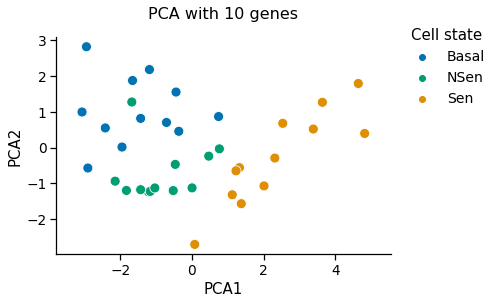

In [56]:
pca_computing_sen(df_top10genes, "PCA with 10 genes", "figures/" ,"PCA_10_genes.tiff")

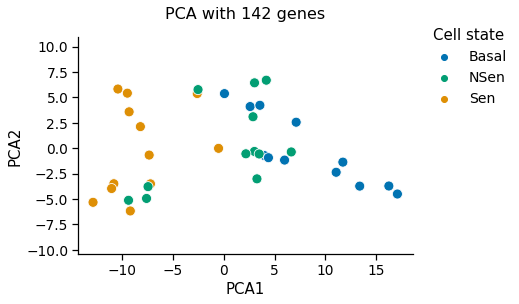

In [57]:
pca_computing_sen(df_142genes, "PCA with 142 genes", "figures/" ,"PCA_142_genes.tiff")

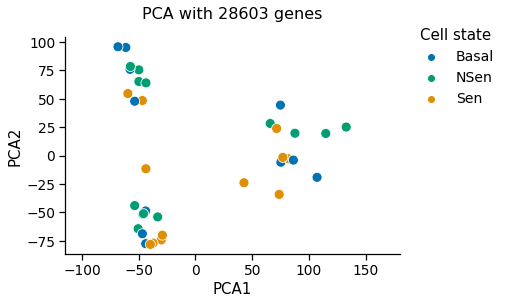

In [58]:
pca_computing_sen(df_28603, "PCA with 28603 genes", "figures/" ,"PCA_28603_genes.tiff")

In [9]:
def pca_computing_cell_type(df, title, path=None, filename=None):
    """
    Function that inputs the dataframe that has genes as rows and features as columns 
    and outputs the PCA analysis with the genes given in thedataframe. 
    The only difference with the previous function is the legend.
    """
    
    #dropping the first column that cointains genedID/symbol and storing it in another df
    df = df.iloc[:, 1:]
    
    #renaming the cells so that they all are labeled as B (basal), N (nonsenescenr) or S (senescent)
    df = df.rename(columns={"G3S": "Satellite", "G7S": "Satellite","G3F": "FAP", "G7F": "FAP","G3M": "Macrophage", "G7M": "Macrophage","Y3S": "Satellite", "Y7S": "Satellite","Y3F": "FAP", "Y7F": "FAP","Y3M": "Macrophage", "Y7M": "Macrophage", "G3SNSen": "Satellite", "G7SNSen": "Satellite","G3FNSen": "FAP", "G7FNSen": "FAP","G3MNSen": "Macrophage", "G7MNSen": "Macrophage","Y3SNSen": "Satellite", "Y7SNSen": "Satellite","Y3FNSen": "FAP", "Y7FNSen": "FAP","Y3MNSen": "Macrophage", "Y7MNSen": "Macrophage", "G3SSen": "Satellite", "G7SSen": "Satellite","G3FSen": "FAP", "G7FSen": "FAP","G3MSen": "Macrophage", "G7MSen": "Macrophage","Y3SSen": "Satellite", "Y7SSen": "Satellite","Y3FSen": "FAP", "Y7FSen": "FAP","Y3MSen": "Macrophage", "Y7MSen": "Macrophage"})
    
    #transposing the dataframe so  that the genes are columns and features are rows
    genes_data = df.T
    
    # standardizing the data
    from sklearn.preprocessing import StandardScaler #transform data so distribution has mean = 0 and st.dev = 1
    scaler = StandardScaler()
    genes_data = scaler.fit_transform(genes_data)

    from sklearn.decomposition import PCA
    pca = PCA(n_components=2).fit(genes_data)
    pca_2d = pca.transform(genes_data)    

    #creating dataframe with umap values
    pca_df = pd.DataFrame(data = pca_2d , columns = ['PCA1', 'PCA2'])
    pca_df['Cell type'] = list(df.T.index)
    
    
    #plotting
    plt.figure()
    with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
        ax = sns.scatterplot(x="PCA1", y="PCA2",
                    data=pca_df, 
                    hue="Cell type",                   
                    s=100,
                    palette = sns.color_palette(['#9467bd','#bcbd22', '#17becf'])) #from colorblind palette in order: blue, green, orange
        plt.xlabel("PCA1")
        plt.ylabel("PCA2")
        plt.title(title, pad = 18, fontsize = 16)
        
    sns.move_legend(ax, "upper right", bbox_to_anchor=(1.42, 1.1), frameon = False, title = "Cell type", fontsize = 14)
    
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False) #--> adjust to remove lines in figures
    plt.gca().set_aspect('equal', 'datalim')
    
    if path==None and filename == None:
        plt.savefig("fig.png", dpi = 500, bbox_inches = 'tight',  transparent=True)
    else:
        plt.savefig(path + filename, dpi = 500, bbox_inches = 'tight',  transparent=True)  

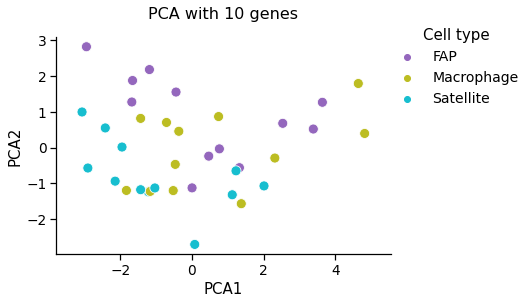

In [10]:
pca_computing_cell_type(df_top10genes, "PCA with 10 genes", "figures/" ,"PCA_10_genes_celltype.tiff")

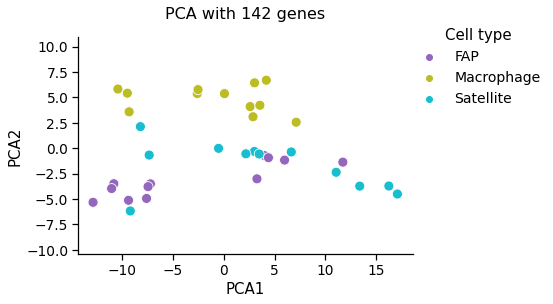

In [11]:
pca_computing_cell_type(df_142genes, "PCA with 142 genes", "figures/" ,"PCA_142_genes_celltype.tiff")

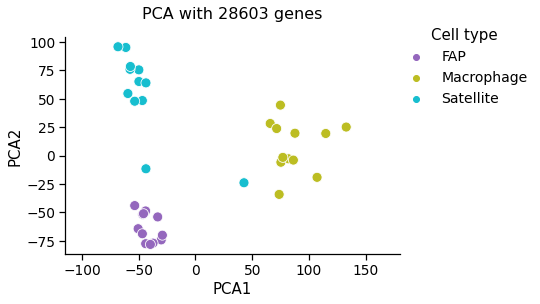

In [12]:
pca_computing_cell_type(df_28603, "PCA with 28603 genes", "figures/" ,"PCA_28603_genes_celltype.tiff")

## 2 UMAP functions

In [13]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap

In [59]:
def umap_computing_sen(df, title, path=None, filename=None):
    """
    Function that imports a dataframe and outputs the plot of the umap transformation. 
    It is required to assign a title to the plot.
    It can also have a path and filename to save the image specified (but default is none).
    """
    
    reducer = umap.UMAP()
    #removing first column from the dataframe (that column contains the symbol/geneID of the gene in the row)
    df = df.iloc[:,1:]
    
    #renaming the cells so that they all are labeled as B (basal), N (nonsenescenr) or S (senescent)
    df = df.rename(columns={"G3S": "Basal", "G7S": "Basal","G3F": "Basal", "G7F": "Basal","G3M": "Basal", "G7M": "Basal","Y3S": "Basal", "Y7S": "Basal","Y3F": "Basal", "Y7F": "Basal","Y3M": "Basal", "Y7M": "Basal", "G3SNSen": "NSen", "G7SNSen": "NSen","G3FNSen": "NSen", "G7FNSen": "NSen","G3MNSen": "NSen", "G7MNSen": "NSen","Y3SNSen": "NSen", "Y7SNSen": "NSen","Y3FNSen": "NSen", "Y7FNSen": "NSen","Y3MNSen": "NSen", "Y7MNSen": "NSen", "G3SSen": "Sen", "G7SSen": "Sen","G3FSen": "Sen", "G7FSen": "Sen","G3MSen": "Sen", "G7MSen": "Sen","Y3SSen": "Sen", "Y7SSen": "Sen","Y3FSen": "Sen", "Y7FSen": "Sen","Y3MSen": "Sen", "Y7MSen": "Sen"})
    
    #transposing the dataframe so  that the genes are columns and features are rows
    transposed_df = df.T

    #scaling the data to be between 0 and 1
    scaled_data = StandardScaler().fit_transform(transposed_df)
    
    #fitting data to umap
    umap_fit = reducer.fit_transform(scaled_data)
    
    #creating dataframe with umap values
    umap_df = pd.DataFrame(data = umap_fit , columns = ['UMAP1', 'UMAP2'])
    umap_df['Cell state'] = list(transposed_df.index)
    
    #plotting
    plt.figure()
    with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
        ax = sns.scatterplot(x="UMAP1", y="UMAP2",
                    data=umap_df, 
                    hue="Cell state",                   
                    s=100,
                    palette = sns.color_palette(['#0173b2','#029e73', '#de8f05'])) #from colorblind palette in order: blue, green, orange
        plt.xlabel("UMAP1")
        plt.ylabel("UMAP2")
        plt.title(title, pad = 18, fontsize = 16)
    sns.move_legend(ax, "upper right", bbox_to_anchor=(1.32, 1.1), frameon = False, title = "Cell state", fontsize = 14)
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False) #--> adjust to remove lines in figures
    
    plt.gca().set_aspect('equal', 'datalim')
    if path==None and filename == None:
        plt.savefig("fig.png", dpi = 300, bbox_inches = 'tight',  transparent=True)
    else:
        plt.savefig(path + filename, dpi = 300, bbox_inches = 'tight',  transparent=True)

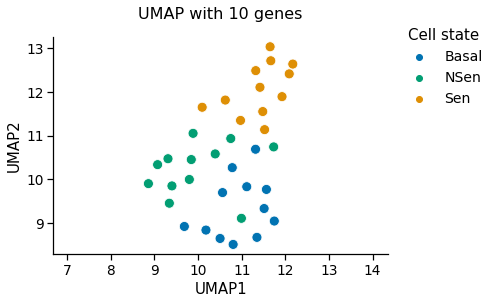

In [60]:
umap_computing_sen(df_top10genes, "UMAP with 10 genes","figures/" ,"UMAP_10_genes.tiff")

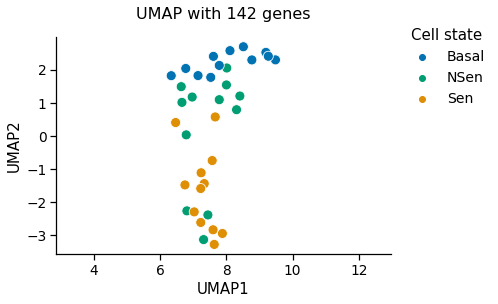

In [61]:
umap_computing_sen(df_142genes, "UMAP with 142 genes", "figures/" ,"UMAP142genes.png")

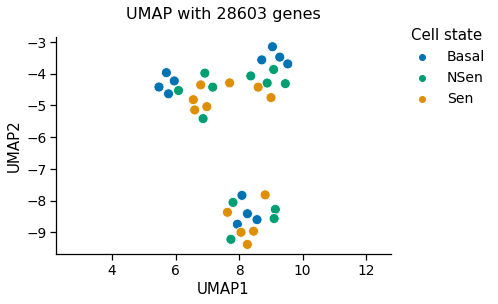

In [62]:
umap_computing_sen(df_28603, "UMAP with 28603 genes", "figures/" ,"UMAP28603genes.png")

In [34]:
def umap_computing_cell_type(df, title, path=None, filename=None):
    """
    Function that imports a dataframe and outputs the plot of the umap transformation. 
    It is required to assign a title to the plot.
    It can also have a path and filename to save the image specified (but default is none).
    The only difference with the previous function is the legend.
    """
    
    reducer = umap.UMAP()
    #removing first column from the dataframe (that column contains the symbol/geneID of the gene in the row)
    df = df.iloc[:,1:]
    
    #renaming the cells so that they all are labeled as B (basal), N (nonsenescenr) or S (senescent)
    df = df.rename(columns={"G3S": "Satellite", "G7S": "Satellite","G3F": "FAP", "G7F": "FAP","G3M": "Macrophage", "G7M": "Macrophage","Y3S": "Satellite", "Y7S": "Satellite","Y3F": "FAP", "Y7F": "FAP","Y3M": "Macrophage", "Y7M": "Macrophage", "G3SNSen": "Satellite", "G7SNSen": "Satellite","G3FNSen": "FAP", "G7FNSen": "FAP","G3MNSen": "Macrophage", "G7MNSen": "Macrophage","Y3SNSen": "Satellite", "Y7SNSen": "Satellite","Y3FNSen": "FAP", "Y7FNSen": "FAP","Y3MNSen": "Macrophage", "Y7MNSen": "Macrophage", "G3SSen": "Satellite", "G7SSen": "Satellite","G3FSen": "FAP", "G7FSen": "FAP","G3MSen": "Macrophage", "G7MSen": "Macrophage","Y3SSen": "Satellite", "Y7SSen": "Satellite","Y3FSen": "FAP", "Y7FSen": "FAP","Y3MSen": "Macrophage", "Y7MSen": "Macrophage"})

    #transposing the dataframe so  that the genes are columns and features are rows
    transposed_df = df.T

    #scaling the data to be between 0 and 1
    scaled_data = StandardScaler().fit_transform(transposed_df)
    
    #fitting data to umap
    umap_fit = reducer.fit_transform(scaled_data)
    
    #creating dataframe with umap values
    umap_df = pd.DataFrame(data = umap_fit , columns = ['UMAP1', 'UMAP2'])
    umap_df['Cell type'] = list(transposed_df.index)
    
    #plotting
    plt.figure()
    with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
        ax = sns.scatterplot(x="UMAP1", y="UMAP2",
                    data=umap_df, 
                    hue="Cell type",                   
                    s=100,
                    palette = sns.color_palette(['#9467bd','#bcbd22', '#17becf']))
        plt.xlabel("UMAP1")
        plt.ylabel("UMAP2")
        plt.title(title, pad = 18, fontsize = 16)

    sns.move_legend(ax, "upper right", bbox_to_anchor=(1.42, 1.1), frameon = False, title = "Cell type", fontsize = 14)
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False) #--> adjust to remove lines in figures
    plt.gca().set_aspect('equal', 'datalim')
    if path==None and filename == None:
        plt.savefig("fig.png", dpi = 500, bbox_inches = 'tight',  transparent=True)
    else:
        plt.savefig(path + filename, dpi = 500, bbox_inches = 'tight',  transparent=True)

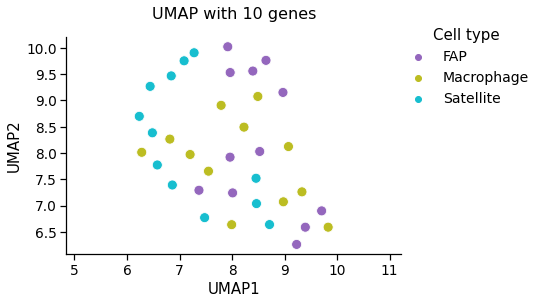

In [35]:
umap_computing_cell_type(df_top10genes, "UMAP with 10 genes", "figures/" ,"UMAP_10_genes_celltype.tiff")

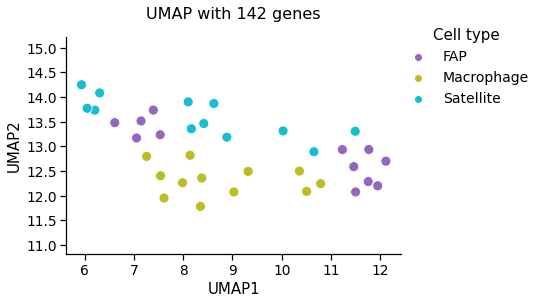

In [36]:
umap_computing_cell_type(df_142genes, "UMAP with 142 genes", "figures/" ,"UMAP142genes_celltype.tiff")

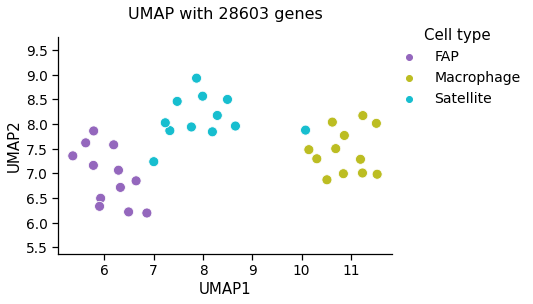

In [37]:
umap_computing_cell_type(df_28603, "UMAP with 28603 genes", "figures/" ,"UMAP28603genes_celltype.tiff")